## FNCE30012: Foundations of Fintech - Assignment 3
This assignment builds on Lectures 3 to 6 and on Tutorials 4 and 5. You might want to consider using some of the Python code discussed in those lectures and tutorials to answer some of the questions below.

**Important:** It is important that you do not change the type (markdwon vs. code) of any cell, nor make any copies of cells! If the cell type is markdown, you are supposed to write text, not code, and vice versa. Provide your answer to each question in the allocated cell. *Do not* create additional cells. Answers provided in any other cell will **NOT** be marked. *Do not* rename the assignment files either.

### Task
You have been asked to assess Betterment's online robot investments adviser (https://www.betterment.com/). The scenario for the assessment is an investor your age who wants to invest USD 20,000 in a portfolio of assets. 

In your assessment, please address the following questions.

### Question 1 (1.5 marks)
Which information does the robo-adviser ask for from the customer (that is, which inputs does the robo-adviser request from the customer)?

### Answer 1

-Whether the customer is retired or not, retirement status (qualitative binary data)

-Customer's age (quantitative discrete data)

-Customer's annual pre-tax income (quantitative continuous data)

-Selected investment goal provided by the options (qualitative data) 

### Question 2 (1 mark)
What is the nature of the advice provided by the robo-adviser (that is, what is the output provided by the robo-adviser)?

### Answer 2

The output are 3 options of "Investment goals" as recommendations based on the customer's age and income. The customer's choice will depend on the customer's investment preference. They are called "Safety Net", "Retirement", and "General Investing". The "safety net" option is formed as a conservative portfolio and also highlighted as an emergency fund. "Retirement" option is geared towards customers who are focused on having enough money for retirement. "General Investing" option is made for customers with no clear intention of savings. All 3 options highlight the allocation of stocks and bonds. Betterment depicts stocks and bonds as 2 assets that contrast each other in terms of their riskiness. For a 21 year old with a annual pre tax income of \\$20,000, the safety net's target amount is \\$4,979 with allocation of 15:85 of stocks to bonds ratio. The retirement and general investing options provide the same allocation of stocks to bonds ratio of 90:10.


### Question 3 (0.5 marks)
Identify the risk-free asset (in portfolio theory) from among the recommended assets.

### Answer 3

US short term treasury bonds given from safety net goal.

### Question 4 (4 marks)
Is the advice consistent with principles of portfolio theory? In your answer, make reference to the separation property and the capital allocation line.

**Hint:** You could use the code provided in Tutorials 4 and 5 to check for consistency. If you decide to use the code provided in the tutorials to compute optimal portfolios, we recommend that you use the simulation (random portfolios) approach.

**Note:** Make sure you provide your text answer in the markdown cell and any code in the code cell! 

### Answer 4 - Text

The first part of the separation property of modern portfolio theory would suggest a composition of risky securities that would maximise the sharpe ratio. This is done by finding the highest excess return per risk unit. This is exactly what the options of "retirement" and "general investing" have shown as they do not include any US short term treasury bonds (risk free asset). Hence, at this part, all customers should have the same risky portfolio from a given set of securities. Not only the same risky portfolios, but also the same capital allocation line as the risk free asset for all customers are also the same. This is evidence of a part of portfolio theory in which the advice is consistent with. However, subject constraints play a huge role in Betterment as changing the age will change the composition between stocks and bonds; in which older customers are suggested portfolios of higher bonds allocation. This is the one constraint that is visible. Another constraint is to not allow short-selling and this can also be seen as the allocation of securities are all positive numbers. Without detailed risk profiling, customers' risk aversion level cannot be obtained, hence the optimal allocation between risky and risk free asset are not shown. Except for the safety net option; in which it is fixed with 52.1% of risk-free assets even after changing the input parameters. This is inconsistent to the portfolio theory as this would suggest that every customer has the same risk aversion level.

Simulation is a good tool to map out possibilities of different combinations of securities allocation as the returns and variances are calculated for each simulation and compared to others. The code below has given results, but should not be a direct comparison to that of betterment. This is because we do not know all the constraints that Betterment uses, source of data, and period of sample. Although U.S. Total Stock Market (VTI: Vanguard Total Stock Market ETF) does have the highest weight in my simulation results and the composition of both retirement and general investing options. Hence, hinting concistency of the advice with the portfolio theory.


### Answer 4 - Code

symbol         AGG        BNDX         EMB         MUB         VBR  \
count   500.000000  500.000000  500.000000  500.000000  500.000000   
mean      0.000042    0.000112    0.000001    0.000059    0.000140   
std       0.001705    0.001561    0.003411    0.001500    0.008818   
min      -0.006968   -0.017245   -0.011339   -0.007675   -0.037734   
25%      -0.001026   -0.000547   -0.002009   -0.000650   -0.003995   
50%       0.000094    0.000183    0.000184    0.000092    0.000592   
75%       0.001110    0.000911    0.001953    0.000901    0.005060   
max       0.006596    0.004394    0.012669    0.010842    0.043728   

symbol         VEA         VOE         VTI        VTIP         VTV         VWO  
count   500.000000  500.000000  500.000000  500.000000  500.000000  500.000000  
mean      0.000053    0.000180    0.000409    0.000004    0.000298    0.000131  
std       0.007740    0.008184    0.008828    0.001220    0.008173    0.010860  
min      -0.040790   -0.037464   -0.039349   

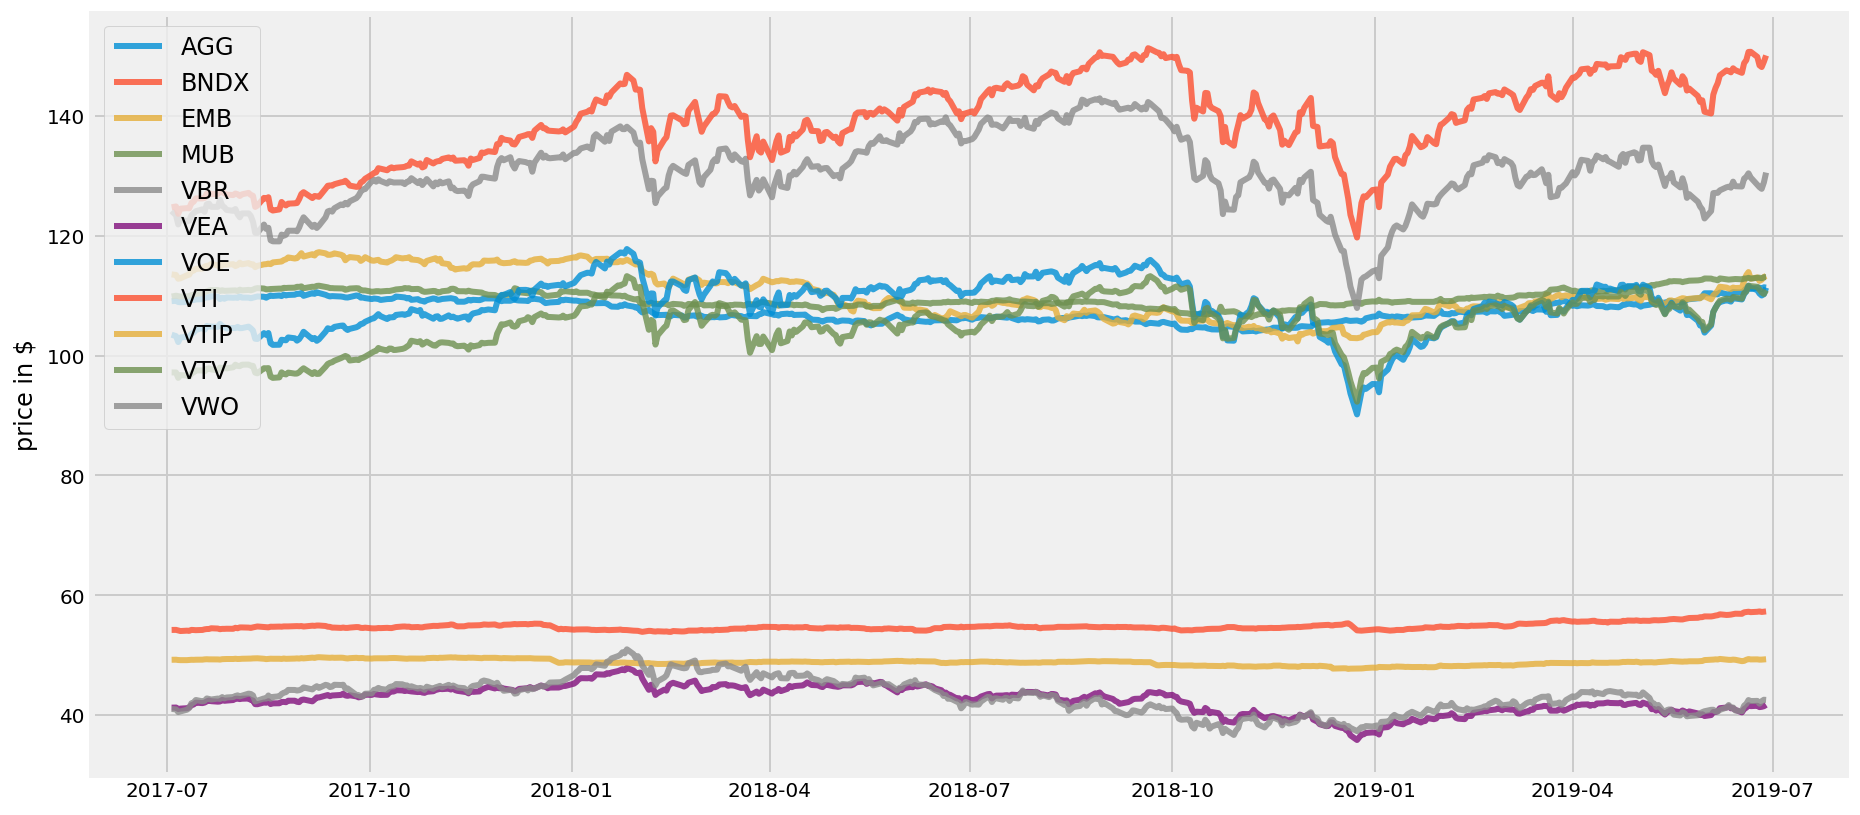

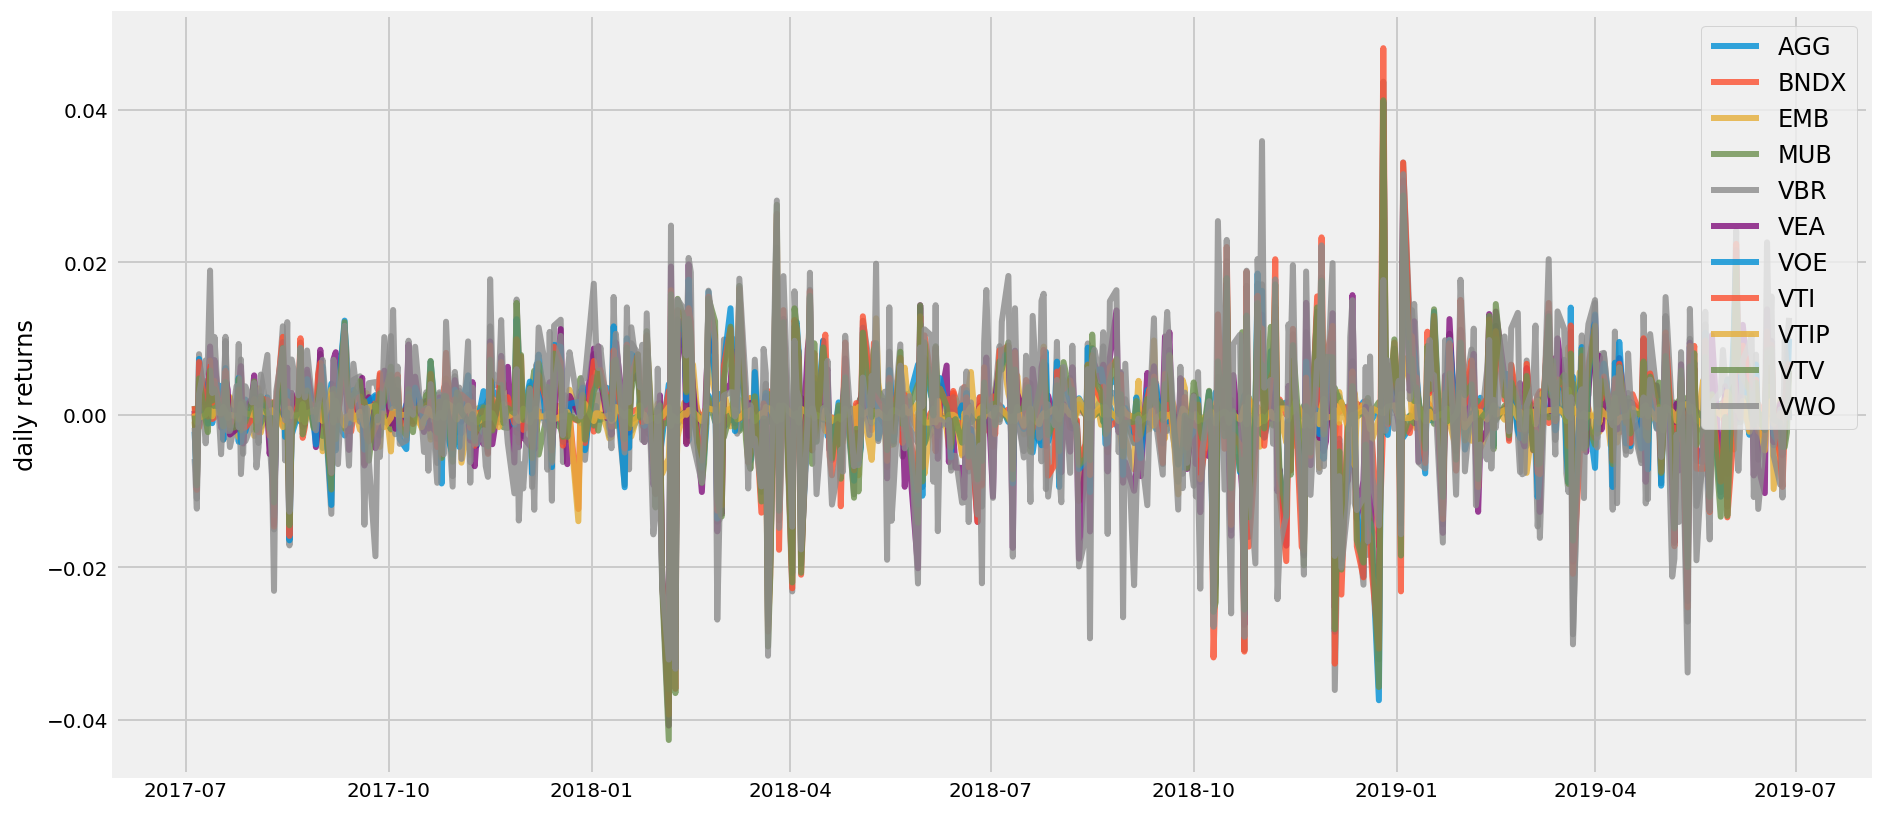

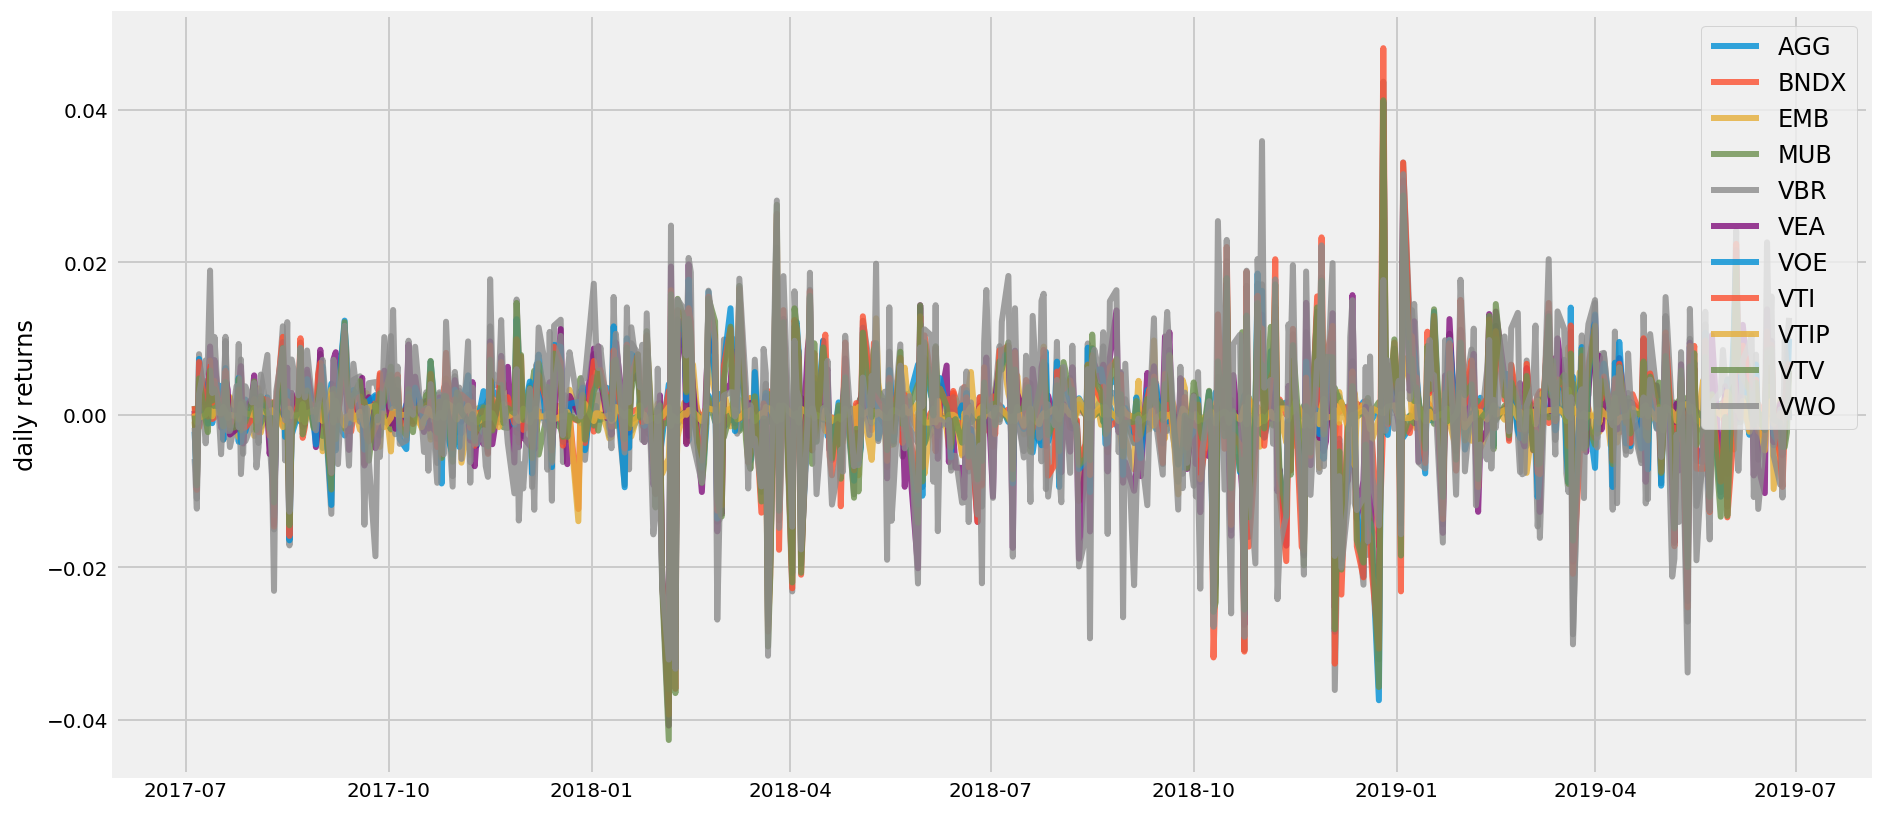

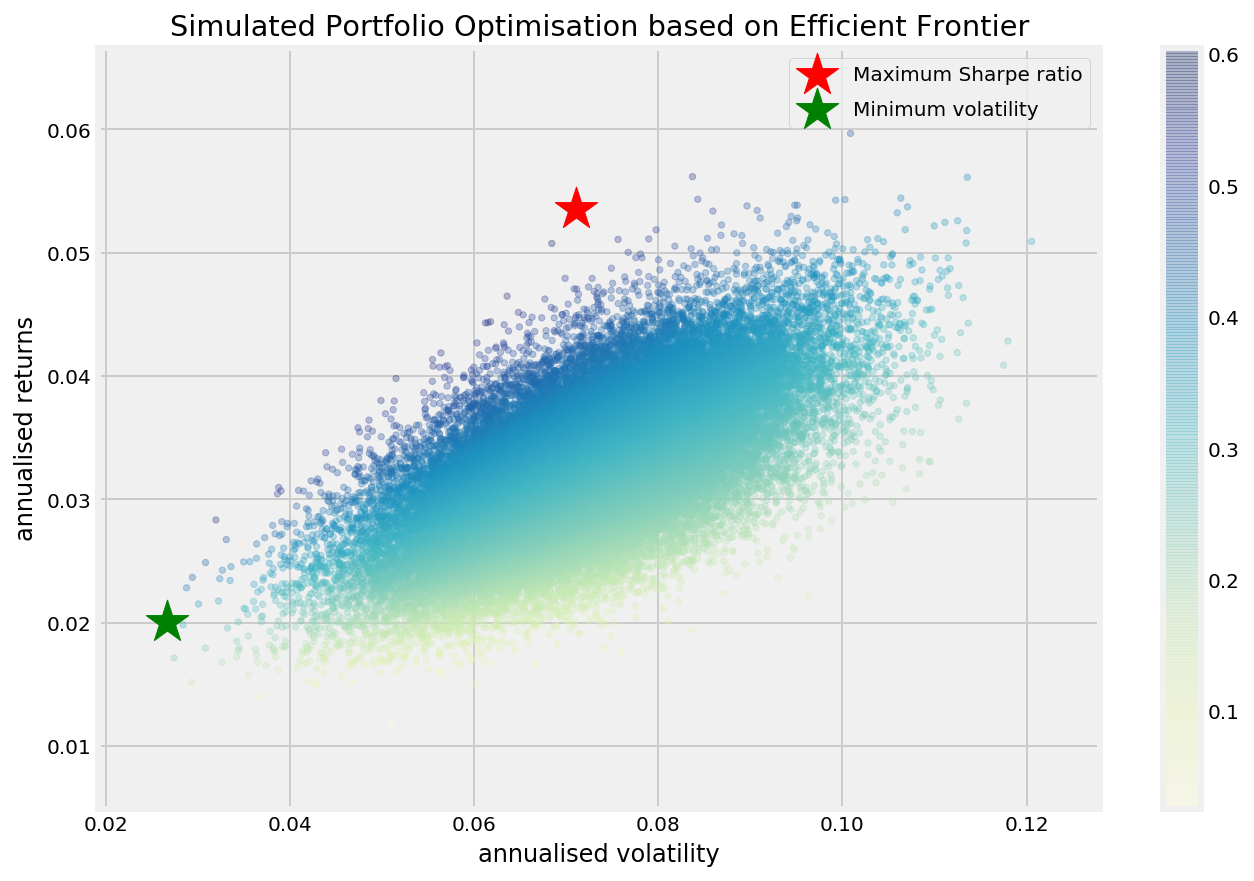

In [3]:
"""Write your code in this cell"""
# YOUR CODE HERE

'''
import packages
'''
import os
import pandas as pd  
import pandas_datareader as pdr
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco

plt.style.use('fivethirtyeight')
#np.random.seed(777)  not using a seed

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
'''
retrieve ETF price data (using pandas-datareader package)
'''
# Tiingo API token
TIINGO_API_KEY = "653ff01e83f6b7e0bd2d5f9c3f651c2c63780425"
# set start and end date
start_date = dt.datetime(2017, 7, 1)
end_date = dt.datetime(2019, 6, 30)
# select ticker symbols.. taken from betterment retirement plan 
tickers =['EMB','BNDX','VTI','VWO','VTV','VTIP','VBR','MUB','VEA','VOE','AGG']
# retrieve price information
panel_data = pdr.get_data_tiingo(tickers, api_key=TIINGO_API_KEY)

panel_data.head()

'''
prepare data for analysis
'''
# we just need the closing price
close = pd.DataFrame(panel_data['close'])

# we just want weekdays
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B') #business days 
all_weekdays = all_weekdays.tz_localize('UTC')  # consistency of time using utc

# reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays, level='date')    

# fill missing values with last available value so that there are no NAs
close = close.fillna(method='ffill')

# swap row indexes,,, swaps the first and second column
close.index = close.index.swaplevel(0,1)
close.head()

'''
organise data as table with one column per stock to maek it unstacked
'''
# drop level 1 column
close_inner = pd.DataFrame(close.xs('close', axis=1, drop_level=True))
# unstack df
close_unstacked = close_inner.unstack()
# drop level 1 column
table = pd.DataFrame(close_unstacked.xs('close', axis=1, drop_level=True))

table.head()

#plot 
plt.figure(figsize=(14, 7))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $');

'''
plot daily return series
'''
returns = table.pct_change()
print(returns.describe())

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns');


'''
plot daily return series
'''
returns = table.pct_change()
print(returns.describe())

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns');

### functions 

'''
portfolio performance evaluation function
'''
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

'''
generate random portfolios
'''
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    # set up some data structures
    results = np.zeros((3, num_portfolios))
    weights_record = []
    # generate portfolios and evaluate
    for i in range(num_portfolios):
        # generate random weights
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        weights_record.append(weights)
        # evaluate performance
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

'''
set parameters for portfolio generation
'''
returns = table.pct_change() # daily returns of our four stocks
mean_returns = returns.mean() # means of daily returns
cov_matrix = returns.cov() # build return covariance matric
num_portfolios = 50000 # generate 50,000 random portfolios
risk_free_rate = 0.010573324 # risk-free rate for observation period

'''
simulate random portfolios and display
'''
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    # generate random portfolios 
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    # find portfolio with highest sharp ratio
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    # find minimum variance portfolio
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    # print performance and allocations
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    # plot results
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimisation based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    
'''
run simulation
'''
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

### Question 5 (1 mark)
How does the advice change with a change in age and income? Are the changes consistent with portfolio theory?

### Answer 5

Increasing income only increases the target of safety net option. This is consistent with the portfolio theory as income is not a factor when choosing a combination of securities. While increasing age increases the composition of bonds in retirement and general investing goal (at a different rate given by the diagram on the website). The usual portfolio theory would suggest the same composition of optimum risky portfolio regarding any factors. Hence, the changes is not consistent with portfolio theory. However, this might just be due to the constraints when doing the computation.




### Question 6 (1.5 marks)
Does the robo-adviser ask for any information other than demographic (e.g., age, gender) or financial information? For instance, does it ask for psychological information? In case it does, in your view, (1) how is this information related to standard portfolio theory and (2) what do you believe is the purpose of requesting such information?

### Answer 6

 Betterment only asks for:
-Whether the customer is retired or not, retirement status (qualitative binary data)

-Customer's age (quantitative discrete data)

-Customer's annual pre-tax income (quantitative continuous data)

-Selected investment goal provided by the options (qualitative data) 

It does not ask for any psychological information. Such information would be useful in the second part of the separation propperty of the portfolio theory. A combination of psychological information can help build risk profiles of customers. This can be done by uitilsing machine learning tools such as neural networks, K-NN clustering, etc. Finding similarities between customers and clustering them can help build an accurate model. Risk profiles of customers would benefit betterment in suggesting the right allocation between risky portfolio and risk free asset (the point along the Capital Allocation Line) to different customers. 

 

### Question 7 (0.5 marks)
What is the fee structure of the robo-adviser (e.g., is it a flat fee or does it depend on the amount invested)?

### Answer 7

For Betterment, fee depends on the account balance. There are also 2 types of products given: Digital and Premium. Tha basic digital has an annual fee of 0.25% and the premium (with additional benefits and $100000 minimum balance) has an annual fee of 0.40\\%.

For customers with balances over \\$2 million, the digital and premium annual fee are 0.15% and 0.30% per year respectively. 

(information taken from https://www.betterment.com/frequently-asked-questions/)